In [60]:
import os 
import duckdb_query_graph
import json
import csv
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib
import math
import pylab
import seaborn as sns

In [2]:
cwd = os.getcwd()
cwd

'/Users/chuyinghe/Documents/duckdb-master-rl/chuying/visualization/2.with timer'

In [3]:
data_dp_csv = cwd + '/0810data/data_dp.csv'
data_rl_csv = cwd + '/0810data/data_rl.csv'
data_dp = pd.read_csv(data_dp_csv)  
data_rl = pd.read_csv(data_rl_csv) 
data_rl

,SQL,Optimizer,Join order,duration
0,6f.sql,RL Optimizer,0-2-1-4-3-,0.490
1,6d.sql,RL Optimizer,0-2-1-3-4-,0.461
2,5a.sql,RL Optimizer,0-2-3-1-4-,0.439
3,5c.sql,RL Optimizer,0-2-3-1-4-,0.427
4,8a.sql,RL Optimizer,1-0-3-2-4-5-6-,0.568
5,4b.sql,RL Optimizer,0-2-3-1-4-,0.344
6,3a.sql,RL Optimizer,0-2-1-3-,0.363
7,1b.sql,RL Optimizer,0-2-3-1-4-,0.388
8,6c.sql,RL Optimizer,0-2-1-3-4-,0.334
9,4c.sql,RL Optimizer,0-2-3-1-4-,0.364


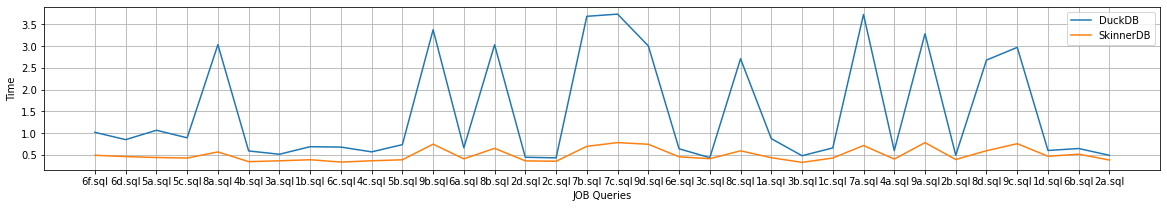

In [5]:
plt.rcParams["figure.figsize"] = (20,3)
plt.xlabel("JOB Queries")
plt.ylabel("Time")
#plt.plot(data_dp['SQL'],data_dp['duration'], label = 'dp')
#plt.plot(data_dp['SQL'],data_dp['duration'], label = 'dp')

#plt.plot(data_dp['SQL'],data_dp['duration'], data_rl['SQL'],data_rl['duration'])
plot1, = plt.plot(data_dp['SQL'],data_dp['duration'])
plot2, = plt.plot(data_rl['SQL'],data_rl['duration'])

plt.legend([plot1,plot2],["DuckDB", "SkinnerDB"])

plt.grid()
plt.show()

In [90]:
data_dp_csv = cwd + '/0817test/data_dp.csv'
data_rl_csv = cwd + '/0817test/data_rl.csv'

data_dp = pd.read_csv(data_dp_csv)  
data_rl = pd.read_csv(data_rl_csv) 

data_dp = data_dp.values.tolist()
data_rl = data_rl.values.tolist()
header = ['1a.sql', '1b.sql', '1c.sql', '1d.sql', '2a.sql', '2b.sql', '2c.sql', '2d.sql', '3a.sql', '3b.sql', 
          '3c.sql', '4a.sql', '4b.sql', '4c.sql', '5a.sql', '5b.sql', '5c.sql', '6a.sql', '6b.sql', '6c.sql', 
          '6d.sql', '6e.sql', '6f.sql', '7a.sql', '7b.sql', '7c.sql', '8a.sql', '8b.sql', '8c.sql', '8d.sql', 
          '9a.sql', '9b.sql', '9c.sql', '9d.sql', '10a.sql', '10b.sql', '10c.sql', '11a.sql', '11b.sql', 
          '11c.sql', '11d.sql', '12a.sql', '12b.sql', '12c.sql', '13a.sql', '13b.sql', '13c.sql', '13d.sql', 
          '14a.sql', '14b.sql', '14c.sql', '15a.sql', '15b.sql', '15c.sql', '15d.sql', '16a.sql', '16b.sql', 
          '16c.sql', '16d.sql', '17a.sql', '17b.sql', '17c.sql', '17d.sql', '17e.sql', '17f.sql', '18a.sql', 
          '18b.sql', '18c.sql', '19a.sql', '19b.sql', '19c.sql', '19d.sql', '20a.sql', '20b.sql', '20c.sql', 
          '21a.sql', '21b.sql', '21c.sql', '22a.sql', '22b.sql', '22c.sql', '22d.sql', '23a.sql', '23b.sql', 
          '23c.sql', '24a.sql', '24b.sql', '25a.sql', '25b.sql', '25c.sql', '26a.sql', '26b.sql', '26c.sql', 
          '27a.sql', '27b.sql', '27c.sql', '28a.sql', '28b.sql', '28c.sql', '29a.sql', '29b.sql', '29c.sql', 
          '30a.sql', '30b.sql', '30c.sql', '31a.sql', '31b.sql', '31c.sql', '32a.sql', '32b.sql', '33a.sql', 
          '33b.sql', '33c.sql']

In [91]:
#plt.rcParams["figure.figsize"] = (20,20)
#data_dp.plot.box(grid='True')
data_dp

[[1.873, 1.89],
 [0.688, 0.69],
 [0.659, 0.69],
 [0.601, 0.69],
 [0.489, 0.49],
 [0.492, 0.49],
 [0.431, 0.49],
 [0.445, 0.49],
 [0.514, 0.59],
 [0.48, 0.9],
 [0.435, 0.49],
 [0.597, 0.59],
 [0.59, 0.9],
 [0.569, 0.59],
 [1.066, 1.09],
 [0.735, 0.79],
 [0.892, 0.89],
 [0.663, 0.69],
 [0.646, 0.69],
 [0.679, 0.69],
 [0.85, 0.9],
 [0.64, 0.9],
 [1.018, 1.09],
 [3.728, 3.79],
 [3.686, 3.69],
 [3.736, 3.79],
 [3.035, 3.09],
 [3.031, 3.09],
 [2.71, 2.9],
 [2.679, 2.69],
 [3.284, 3.29],
 [3.377, 3.39],
 [2.972, 2.99],
 [3.006, 3.09],
 [0.873, 0.89],
 [0.688, 0.69],
 [0.659, 0.69],
 [0.601, 0.69],
 [0.489, 0.49],
 [0.492, 0.49],
 [0.431, 0.49],
 [0.445, 0.49],
 [0.514, 0.59],
 [0.48, 0.9],
 [0.435, 0.49],
 [0.597, 0.59],
 [0.59, 0.9],
 [0.569, 0.59],
 [1.066, 1.09],
 [0.735, 0.79],
 [0.892, 0.89],
 [0.663, 0.69],
 [0.646, 0.69],
 [0.679, 0.69],
 [0.85, 0.9],
 [0.64, 0.9],
 [1.018, 1.09],
 [3.728, 3.79],
 [3.686, 3.69],
 [3.736, 3.79],
 [3.035, 3.09],
 [3.031, 3.09],
 [2.71, 2.9],
 [2.679, 2.6

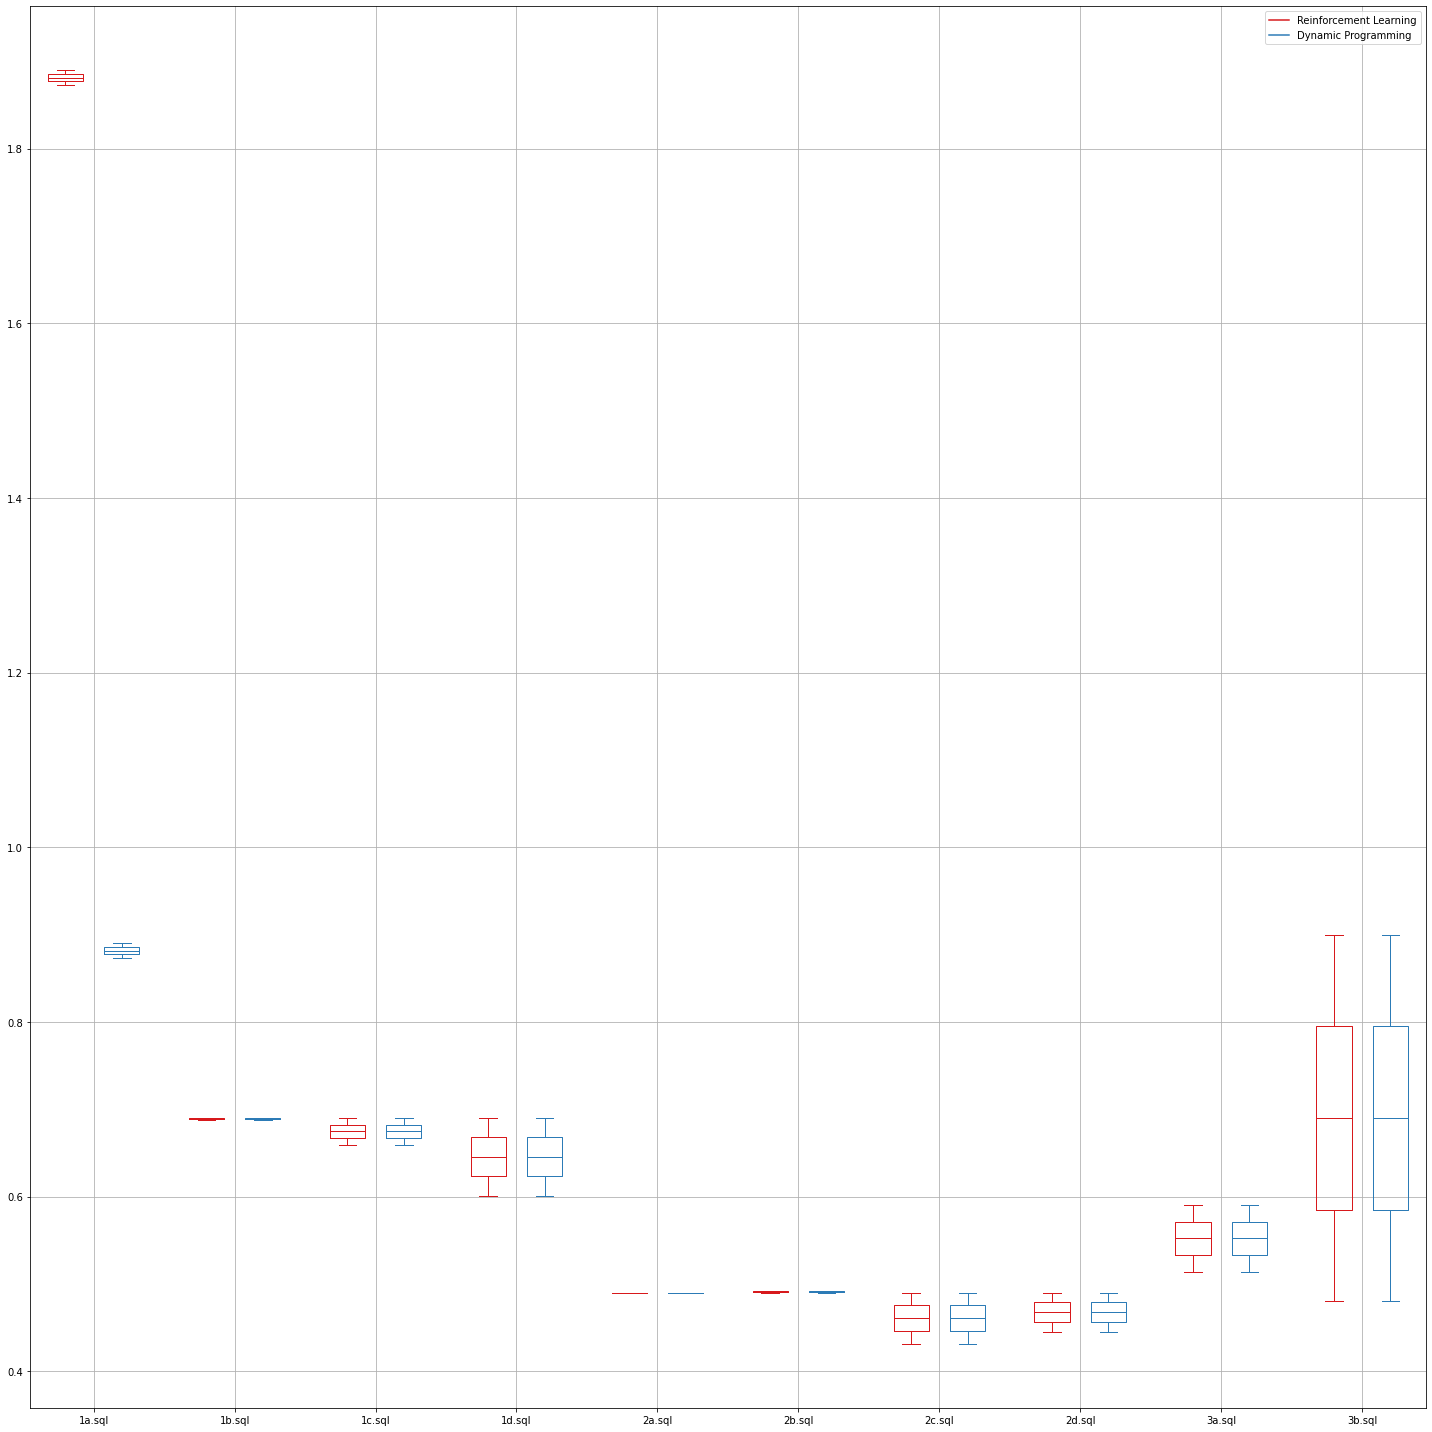

In [92]:
plt.rcParams["figure.figsize"] = (20,20)

ticks = header[:10]
data_dp = data_dp[:10]
data_rl = data_rl[:10]

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

#bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.4, sym='', widths=0.6)
#bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.4, sym='', widths=0.6)
bpl = plt.boxplot(data_dp, positions=np.array(range(len(data_dp)))*2.0-0.4)
bpr = plt.boxplot(data_rl, positions=np.array(range(len(data_rl)))*2.0+0.4)

set_box_color(bpl, '#D7191C') # red - RLcolors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6') # blue - DP

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Reinforcement Learning')
plt.plot([], c='#2C7BB6', label='Dynamic Programming')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
#plt.xlim(-2, len(ticks)*2)
#plt.ylim(0, 8)
plt.tight_layout()
plt.savefig('boxcompare.png')
plt.grid()
plt.show()

<AxesSubplot:xlabel='Group', ylabel='value'>

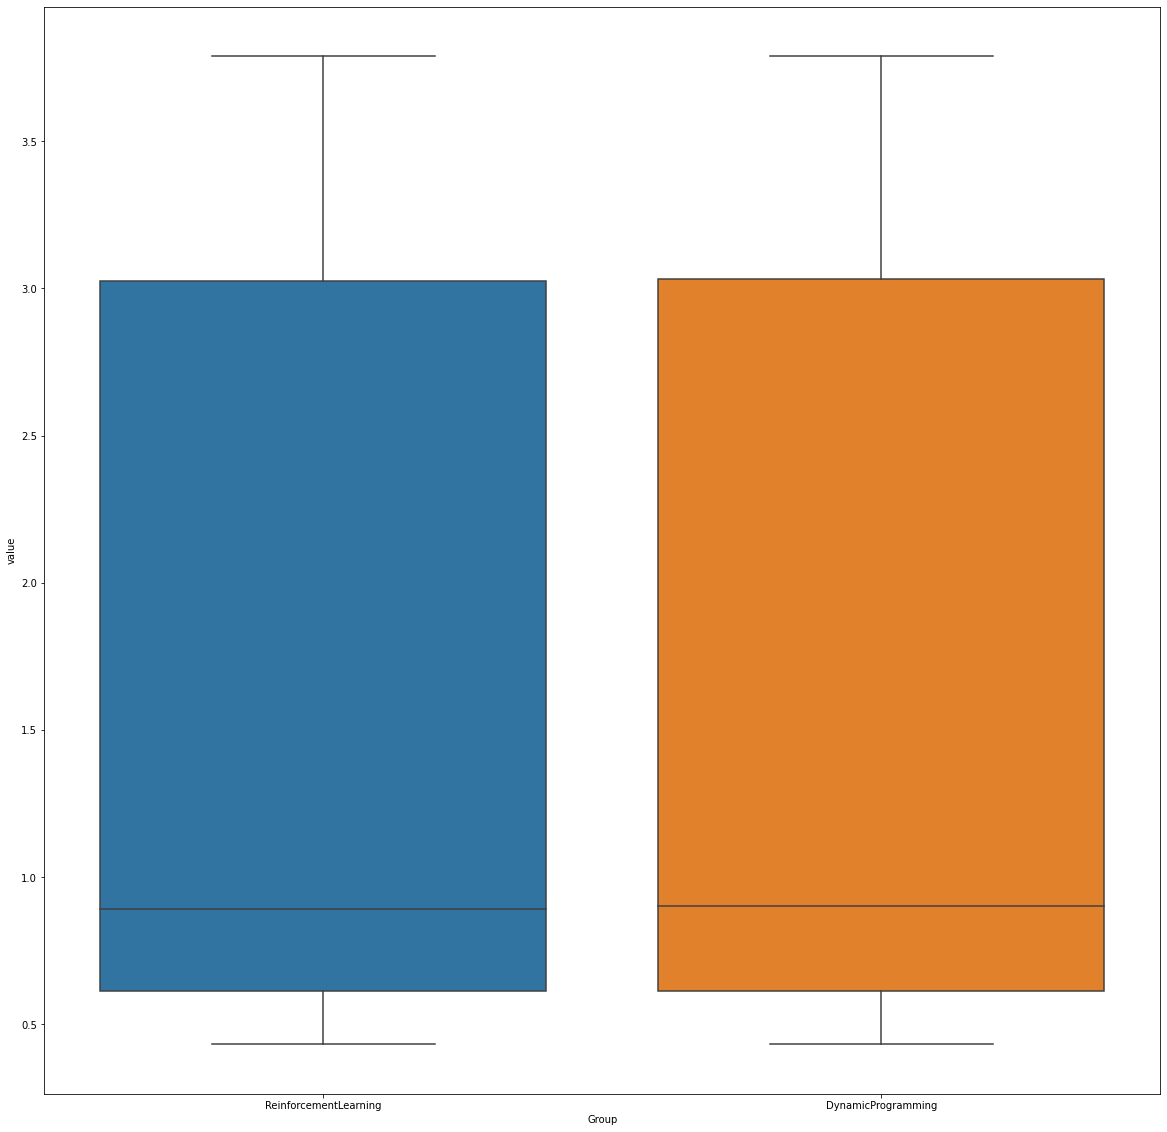

In [131]:
dd=pd.melt(total_df,id_vars=['Group'],value_vars=header,var_name='JOB Queries')
sns.boxplot(x='Group',y='value',data=dd)

# Statistic- 0: Average

In [61]:
cwd = os.getcwd()
my_csv = cwd + '/output-total.csv'
my_df = pd.read_csv(my_csv) 
my_df['ExecutionTime'] = np.log(my_df['ExecutionTime'])
my_df['ExecutionTime'] = my_df['ExecutionTime']*0.001
my_df.head()
#Group, Optimizer, Exec

,Group,Optimizer,JoinOrder,ExecutionTime,Loop,Table,Edge
0,10a.sql,Dynamic Programming,6--4---3---2---5--1----0--,0.006854,0,7,7
1,10a.sql,Dynamic Programming,6--4---3---2---5--1----0--,0.006851,0,7,7
2,10a.sql,Dynamic Programming,6--4---3---2---5--1----0--,0.006855,0,7,7
3,10a.sql,Dynamic Programming,6--4---3---2---5--1----0--,0.006855,0,7,7
4,10a.sql,Dynamic Programming,6--4---3---2---5--1----0--,0.006859,0,7,7


In [65]:
print("ExecutionTime: ", max(my_df['ExecutionTime']), min(my_df['ExecutionTime']))
tum_colors = ["#0065BD", "#CCCCC6"]

ExecutionTime:  0.008730922971903199 0.00435094867910302


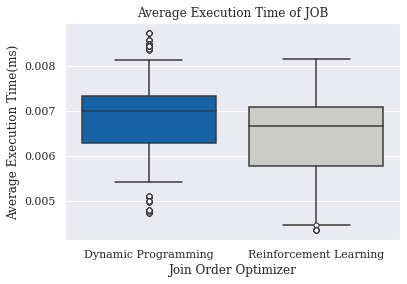

In [68]:
plt.grid(True)
#sns.set_context(rc={"font.family": "DejaVu Sans",'font.sans-serif':'Lucida Grande'})
# sns.set_style("whitegrid")
#matplotlib.font_manager.FontProperties(family='sans serif', style=None, variant=None, weight=None, stretch=None, size=None, fname=None,math_fontfamily='stix')
# plt.text(math_fontfamily='cm')
#plt.rcParams['font.sans-serif'] = ['SimHei']

sns.set_theme(font='serif')

green_diamond = dict(markerfacecolor='white', marker='o', linestyle='none')

boxplot = sns.boxplot(x = my_df["Optimizer"],
                y = my_df["ExecutionTime"],
                #hue = my_df[hue],
                palette = tum_colors,
                flierprops=green_diamond, whis =1)

boxplot.axes.set_title("Average Execution Time of JOB")
boxplot.set_xlabel("Join Order Optimizer")
boxplot.set_ylabel("Average Execution Time(ms)")
plt.savefig('statistic-0.pdf')

# Statistic-1

## 3b.sql

In [16]:
cwd = os.getcwd()
my_csv = cwd + '/statistic_1/3b_sql.csv'
my_df = pd.read_csv(my_csv)  
my_df.head()
#total_df.columns

,Group,Optimizer,PreparationTime,ExecutionTime,TotalTime,Loop
0,3b.sql,Dynamic Programming,0.547,32003.6,32005.3,0
1,3b.sql,Dynamic Programming,0.510,31991.7,31993.4,0
2,3b.sql,Dynamic Programming,0.506,31974.3,31975.9,0
3,3b.sql,Dynamic Programming,0.565,32023.1,32024.8,0
4,3b.sql,Dynamic Programming,0.510,31991.7,31993.4,0


In [17]:
my_df['ExecutionTime'] = np.log(my_df['ExecutionTime'])
my_df.head()

,Group,Optimizer,PreparationTime,ExecutionTime,TotalTime,Loop
0,3b.sql,Dynamic Programming,0.547,10.373604,32005.3,0
1,3b.sql,Dynamic Programming,0.510,10.373232,31993.4,0
2,3b.sql,Dynamic Programming,0.506,10.372688,31975.9,0
3,3b.sql,Dynamic Programming,0.565,10.374213,32024.8,0
4,3b.sql,Dynamic Programming,0.510,10.373232,31993.4,0


In [18]:
print("ExecutionTime: ", max(my_df['ExecutionTime']), min(my_df['ExecutionTime']))
print("PreparationTime: ", max(my_df['PreparationTime']), min(my_df['PreparationTime']))
print("TotalTime: ", max(my_df['TotalTime']), min(my_df['TotalTime']))

ExecutionTime:  10.374212796355428 10.359677460135904
PreparationTime:  0.74 0.496
TotalTime:  32024.8 31561.6


In [19]:
tum_colors = ["#0065BD", "#CCCCC6"]

def boxplot_for_one_query(x_variable, y_variable, hue):
    boxplot = sns.boxplot(x = my_df[x_variable],
                y = my_df[y_variable],
                hue = my_df[hue],
                palette = tum_colors
            )
    boxplot.axes.set_title(y_variable, fontsize=14)
    boxplot.set_xlabel("JOB Query", fontsize=12)
    boxplot.set_ylabel(y_variable, fontsize=12)


# plt.savefig('boxplot for 1a.pdf')

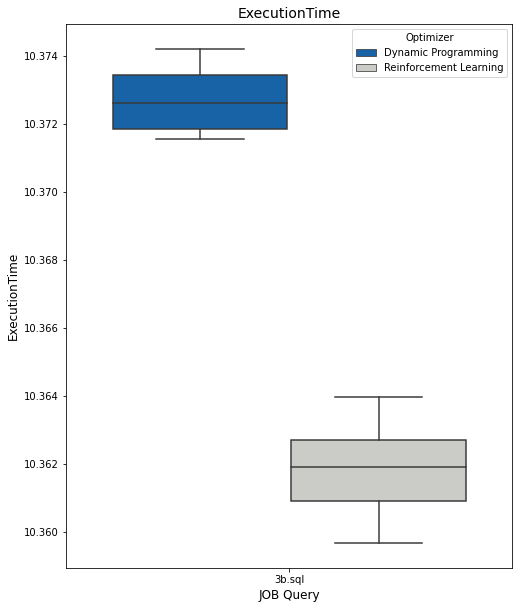

In [20]:
boxplot_for_one_query('Group', 'ExecutionTime','Optimizer')
plt.savefig('statistic_1/statistic_1.pdf')

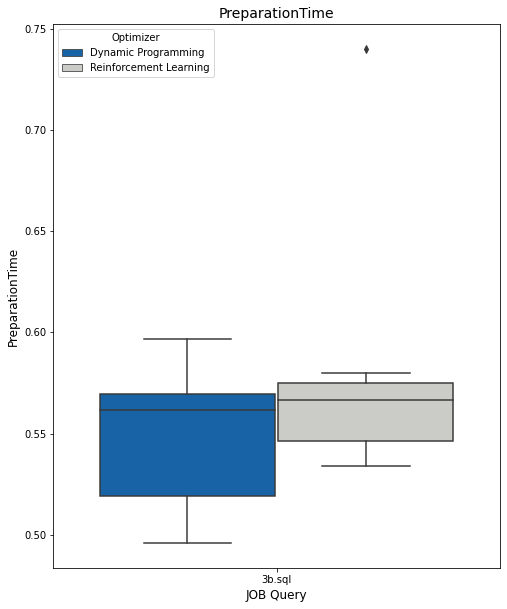

In [21]:
boxplot_for_one_query('Group', 'PreparationTime','Optimizer')

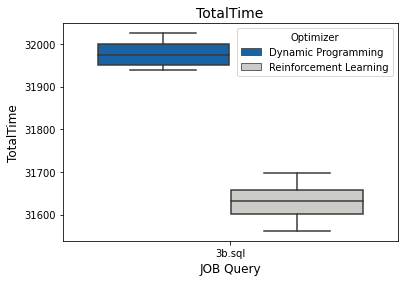

In [32]:
boxplot_for_one_query('Group', 'TotalTime', 'Optimizer')

## 29a.sql

In [7]:
cwd = os.getcwd()
my_csv = cwd + '/statistic_1/29a_sql.csv'
my_df = pd.read_csv(my_csv)  

my_df['ExecutionTime'] = np.log(my_df['ExecutionTime'])
my_df.head()

,Group,Optimizer,PreparationTime,ExecutionTime,TotalTime,Loop
0,29a.sql,Dynamic Programming,3.657,10.405741,33055.0,0
1,29a.sql,Dynamic Programming,3.635,10.404841,33025.3,0
2,29a.sql,Dynamic Programming,3.625,10.405819,33057.6,0
3,29a.sql,Dynamic Programming,3.660,10.405350,33042.1,0
4,29a.sql,Dynamic Programming,3.613,10.404711,33021.0,0


In [8]:
print("ExecutionTime: ", max(my_df['ExecutionTime']), min(my_df['ExecutionTime']))
print("PreparationTime: ", max(my_df['PreparationTime']), min(my_df['PreparationTime']))
print("TotalTime: ", max(my_df['TotalTime']), min(my_df['TotalTime']))

ExecutionTime:  10.406847376444105 10.378323238568964
PreparationTime:  3.663 1.906
TotalTime:  33091.7 32157.2


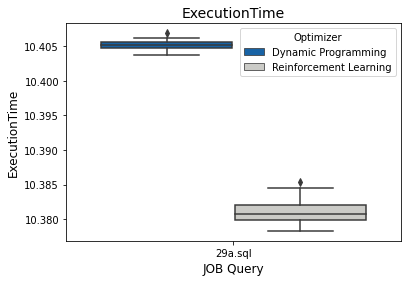

In [9]:
boxplot_for_one_query('Group', 'ExecutionTime', 'Optimizer')
plt.savefig('statistic_1/statistic_1.pdf')

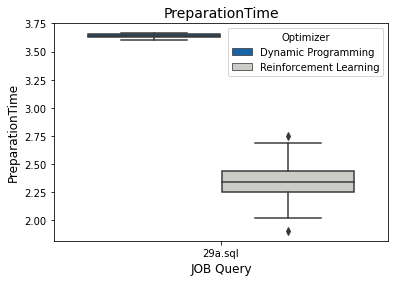

In [10]:
boxplot_for_one_query('Group', 'PreparationTime', 'Optimizer')

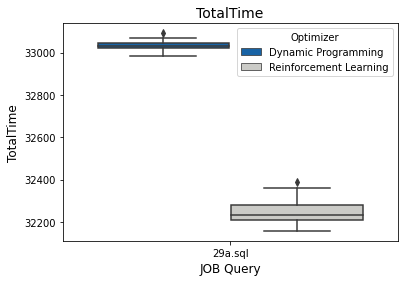

In [11]:
boxplot_for_one_query('Group', 'TotalTime', 'Optimizer')

## all JOB query (total time not accurate) - group by tables

In [17]:
cwd = os.getcwd()
my_csv = cwd + '/output-total.csv'
my_df = pd.read_csv(my_csv)  

my_df['ExecutionTime'] = np.log(my_df['ExecutionTime'])
my_df.head()

,Group,Optimizer,JoinOrder,ExecutionTime,Loop,Table,Edge
0,10a.sql,Dynamic Programming,6--4---3---2---5--1----0--,6.854077,0,7,7
1,10a.sql,Dynamic Programming,6--4---3---2---5--1----0--,6.851040,0,7,7
2,10a.sql,Dynamic Programming,6--4---3---2---5--1----0--,6.854612,0,7,7
3,10a.sql,Dynamic Programming,6--4---3---2---5--1----0--,6.854793,0,7,7
4,10a.sql,Dynamic Programming,6--4---3---2---5--1----0--,6.858732,0,7,7


In [18]:
print("ExecutionTime: ", max(my_df['ExecutionTime']), min(my_df['ExecutionTime']))

ExecutionTime:  8.7309229719032 4.35094867910302


Text(0, 0.5, 'Execution Time')

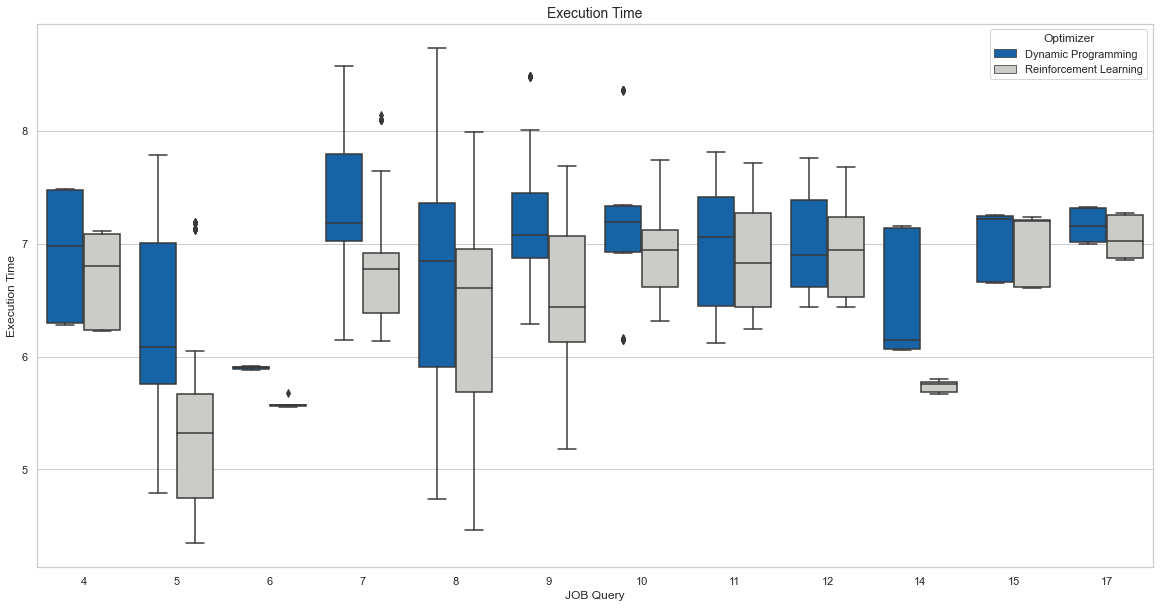

In [23]:
# boxplot: execution time - table amount
tum_colors = ["#0065BD", "#CCCCC6"]
sns.set_theme(style="whitegrid")
boxplot = sns.boxplot(x = my_df['Table'],
            y = my_df['ExecutionTime'],
            hue = my_df['Optimizer'],
            palette = tum_colors
        )
boxplot.axes.set_title('Execution Time', fontsize=14)
boxplot.set_xlabel('Table amount', fontsize=12)
boxplot.set_ylabel('Execution Time', fontsize=12)

## all JOB query (total time not accurate) - group by join

Text(0, 0.5, 'Execution Time')

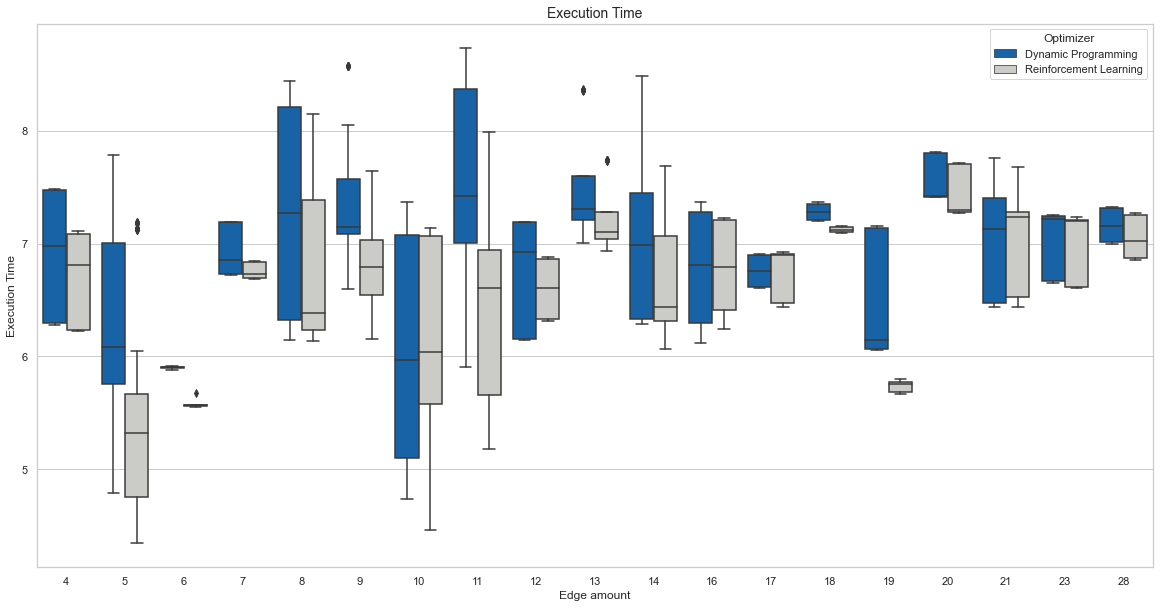

In [24]:
# boxplot: execution time - table amount
tum_colors = ["#0065BD", "#CCCCC6"]
sns.set_theme(style="whitegrid")
boxplot = sns.boxplot(x = my_df['Edge'],
            y = my_df['ExecutionTime'],
            hue = my_df['Optimizer'],
            palette = tum_colors
        )
boxplot.axes.set_title('Execution Time', fontsize=14)
boxplot.set_xlabel('Edge amount', fontsize=12)
boxplot.set_ylabel('Execution Time', fontsize=12)

# Statistic-4

In [59]:
cwd = os.getcwd()
my_csv = cwd + '/statistic_4/local_for_testing.csv'
my_df = pd.read_csv(my_csv)  


# for average['XXX']/AmountOfRelations
grouped_df = my_df.groupby('AmountOfRelations')
mean_df = grouped_df.mean()
mean_df = mean_df.reset_index()
#mean_df.head()

my_df.head()

,Query,AmountOfRelations,PreparationTime,ExecutionTime,TotalTime,Loop
0,10a.sql,7,19.966,12.579,32.545,63
1,10b.sql,7,16.704,11.747,28.451,73
2,11a.sql,8,27.584,10.903,38.487,99
3,11c.sql,8,27.154,12.908,40.062,103
4,11d.sql,8,18.439,10.717,29.156,167


In [60]:
print("AmountOfRelations: ", max(my_df['AmountOfRelations']), min(my_df['AmountOfRelations']))
print("ExecutionTime: ", max(my_df['ExecutionTime']), min(my_df['ExecutionTime']))
print("PreparationTime: ", max(my_df['PreparationTime']), min(my_df['PreparationTime']))
print("TotalTime: ", max(my_df['TotalTime']), min(my_df['TotalTime']))
print("Loop: ", max(my_df['Loop']), min(my_df['Loop']))

AmountOfRelations:  11 4
ExecutionTime:  22.58 4.891
PreparationTime:  38.676 8.542
TotalTime:  54.215 13.433
Loop:  187 14


In [81]:
def scatter_and_line(x_var, y_var):
    plt.scatter(my_df[x_var], my_df[y_var], color='#808080')
    plt.plot(mean_df[x_var], mean_df[y_var], label = "average trend", color='#0065BD')
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.legend()

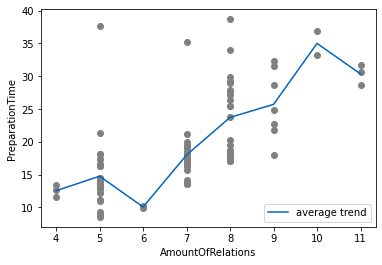

In [82]:
scatter_and_line('AmountOfRelations', 'PreparationTime')
plt.savefig('statistic_4/statistic_4-1.pdf')

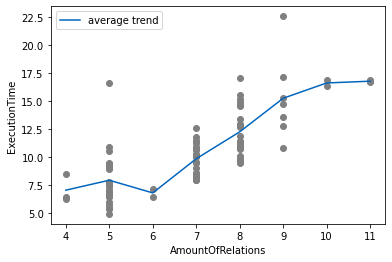

In [83]:
scatter_and_line('AmountOfRelations', 'ExecutionTime')
plt.savefig('statistic_4/statistic_4-2.pdf')

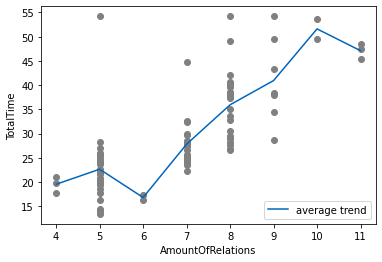

In [84]:
scatter_and_line('AmountOfRelations', 'TotalTime')
plt.savefig('statistic_4/statistic_4-3.pdf')

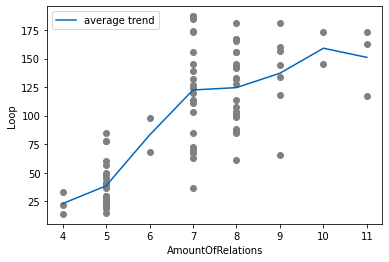

In [85]:
scatter_and_line('AmountOfRelations', 'Loop')
plt.savefig('statistic_4/statistic_4-4.pdf')